In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pandas_profiling as pp

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Target feature  = Survived
# Rest all features will be our independent feature

<AxesSubplot:xlabel='Survived', ylabel='count'>

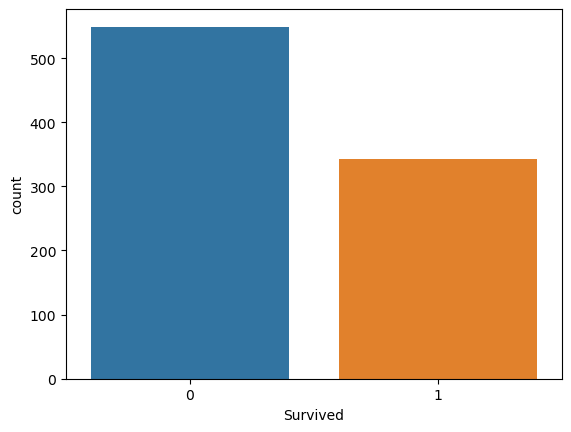

In [7]:
# Lets check the count of Survived and non Survived People.

sns.countplot(data=df,x="Survived")

# in above plot:
     # 1 - reffers to Survived people from the Accident 
     # 0 - reffers to not Survived people from the Accident 
# 500 + passengers not survived from the Accident 
# 300+ passengers survived from the Accident 

<AxesSubplot:xlabel='Survived', ylabel='count'>

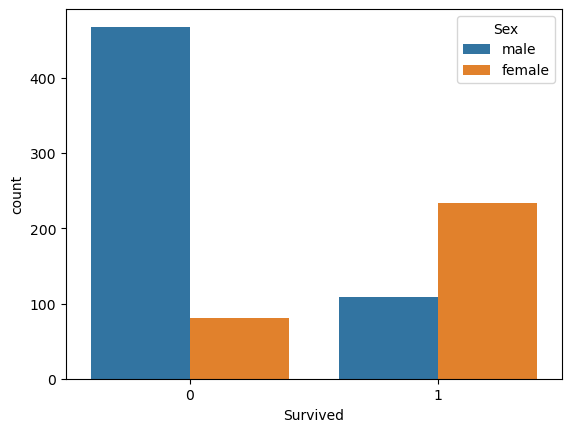

In [8]:
# lets check the Count of Survived by Gender

sns.countplot(data=df,x="Survived", hue="Sex")

# count of Female survived is more compare the to count of Male Survived 

<AxesSubplot:xlabel='Survived', ylabel='count'>

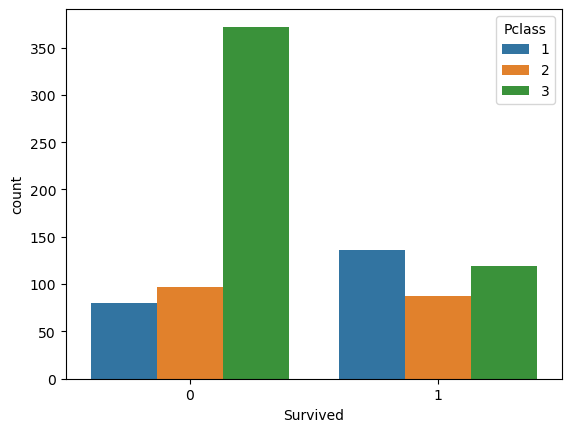

In [9]:
# lets check count of Survived by Pclass 

sns.countplot(data=df,x='Survived',hue='Pclass')

Passengers from Class 1 Survived more.
More passengers from class 3 could not survived.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

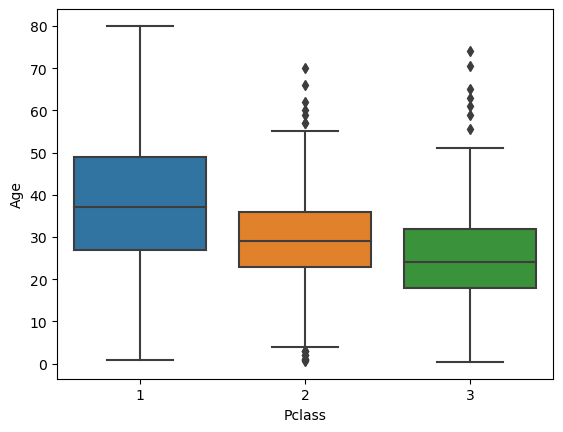

In [10]:
# lets update NaN values in Age column based on Pclass.

#first lets check the median

sns.boxplot(data=df,x="Pclass",y="Age")

# Mediam vaues (the line in the box plot will be our median values)
- for class 1 = median = 38
- for class 2 = median = 29
- for class 3 = median = 24 

In [11]:
# adding median values based on Pclass
# lets define the function for the same 

In [12]:
def fillage(cols):
    age = cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass ==1:    # condition statement
            return 38
        elif pclass ==2:
            return 29
        else:
            return 24
    else:
        return age 

In [13]:
df['Age']=df[['Age','Pclass']].apply(fillage,axis=1)

In [14]:
df.drop('Cabin',axis=1,inplace=True)   # drop the column as more then 50% data is not available 

In [15]:
df.dropna(inplace=True)   # will remove the Null values from all the dataset 

In [16]:
#lets check the Null values if any

df.isnull().sum()  # no null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
#lets check the profile report

pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.032963 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.051524 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.408898  0.081656  0.016824   
Age             0.032963 -0.051524 -0.408898  1.000000 -0.243160 -0.170916   
SibSp          -0.057686 -0.034040  0.081656 -0.243160  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.170916  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.122202  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.122202  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000

<AxesSubplot:>

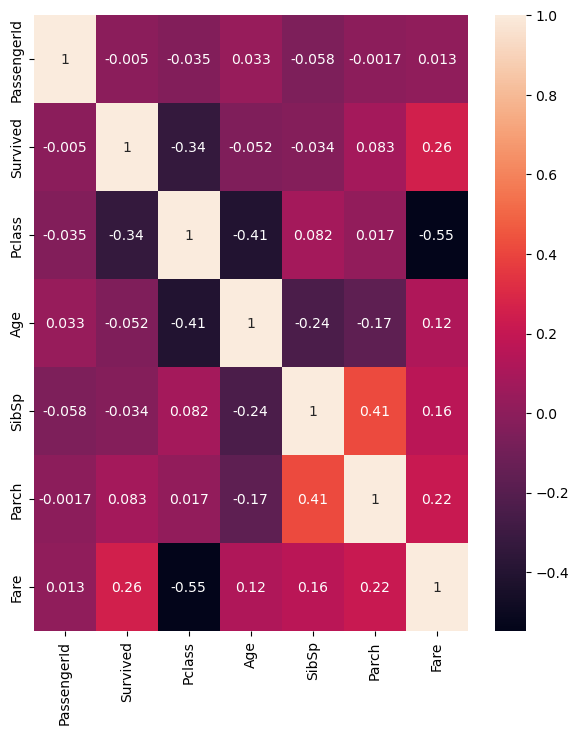

In [19]:
# lets check correlation on heatmap

plt.figure(figsize=(7,8))
sns.heatmap(df.corr(),annot=True)

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
# lets drop the unwanted columns from the data

df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [22]:
df.shape

(889, 8)

In [23]:
df.head(5)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [24]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.053060    0.524184    0.382452   32.096681
std      0.486260    0.834700   13.231443    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   26.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   36.500000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# Handling Outlier 

In [25]:
Numcol = []
Catcol = []

for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        Catcol.append(x)
    else:
        Numcol.append(x)
        

In [26]:
Numcol

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [27]:
Catcol

['Sex', 'Embarked']

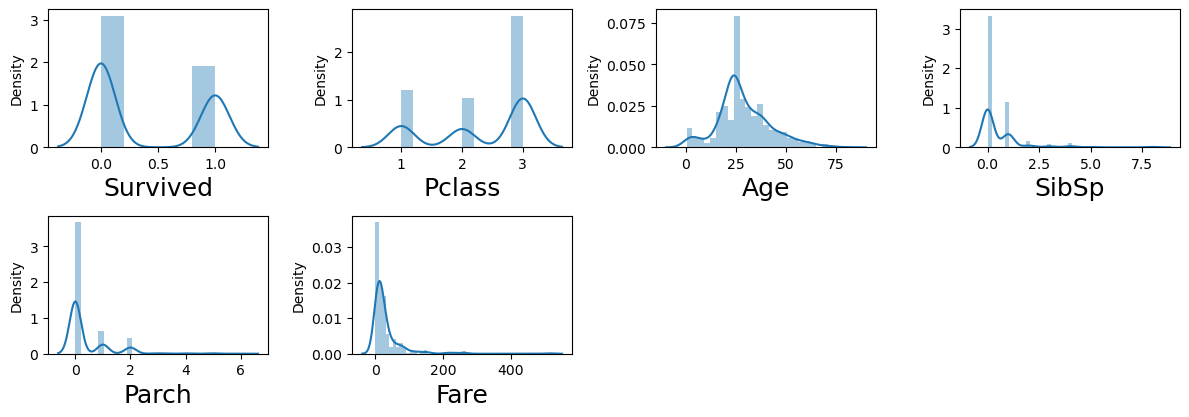

In [28]:
# lets check outliers 

plt.figure(figsize=(12,12))
pltn=1

for i in Numcol:
    if pltn<=15:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=18)
    pltn=pltn+1
plt.tight_layout()

# from above plot we can see that columns have outliers, using zscore we will remoive the outliers.
# And make the data normalized 

In [29]:
from scipy.stats import zscore

In [30]:
z=np.abs(zscore(df[Numcol]))
new_data=df[(z<=3).all(axis=1)]

In [31]:
new_data

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  24.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[818 rows x 8 columns]

In [32]:
new_data.shape   # shape of the new data changed as we have removed outliers.

(818, 8)

# Data loss 

In [33]:
Dataloss = ((889-818)/889)*100            # df - new_data / df * 100
Dataloss

7.986501687289089

# Total data loss after removing the outliers = 7.98 %

In [34]:
# lets check the skewness of the new data
new_data.skew()

Survived    0.457268
Pclass     -0.639191
Age         0.435528
SibSp       1.975774
Parch       2.118544
Fare        2.342849
dtype: float64

<AxesSubplot:>

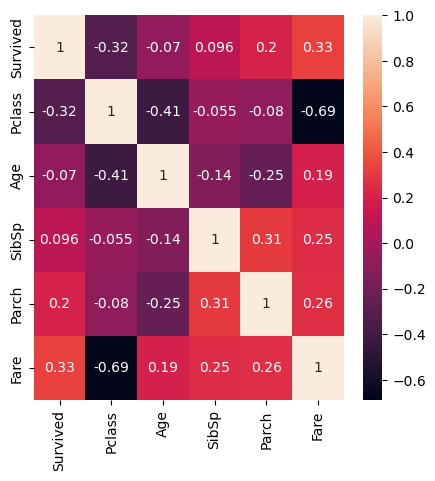

In [35]:
plt.figure(figsize=(5,5))
sns.heatmap(new_data.corr(),annot=True)

In [36]:
# comparing the correlation with the Survived (target column).
# we will remove the skewness from new_data.

In [37]:
skew_columns = ['Age','SibSp','Parch','Fare']

In [38]:
from sklearn.preprocessing import PowerTransformer
strans=PowerTransformer(method='yeo-johnson')

In [39]:
new_data[skew_columns] = strans.fit_transform(new_data[skew_columns].values) 

In [40]:
new_data.skew()

Survived    0.457268
Pclass     -0.639191
Age         0.065834
SibSp       0.945223
Parch       1.577668
Fare       -0.019133
dtype: float64

In [41]:
new_data

Survived  Pclass     Sex       Age     SibSp     Parch      Fare Embarked
0           0       3    male -0.536141  1.548940 -0.485424 -0.832417        S
1           1       1  female  0.732638  1.548940 -0.485424  1.561005        C
2           1       3  female -0.205675 -0.634585 -0.485424 -0.740810        S
3           1       1  female  0.504339  1.548940 -0.485424  1.257134        S
4           0       3    male  0.504339 -0.634585 -0.485424 -0.724649        S
..        ...     ...     ...       ...       ...       ...       ...      ...
886         0       2    male -0.124655 -0.634585 -0.485424 -0.223667        S
887         1       1  female -0.791648 -0.634585 -0.485424  0.659931        S
888         0       3  female -0.369570  1.548940  2.083797  0.399978        S
889         1       1    male -0.205675 -0.634585 -0.485424  0.659931        C
890         0       3    male  0.272156 -0.634585 -0.485424 -0.763841        Q

[818 rows x 8 columns]

In [42]:
new_data_numcol = []
new_data_catcol = []

for i in new_data.dtypes.index:
    if new_data.dtypes[i]=='object':
        new_data_catcol.append(i)
    else:
        new_data_numcol.append(i)
        

In [43]:
new_data_numcol

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [44]:
new_data_catcol

['Sex', 'Embarked']

# Encoding 

In [45]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
new_data[new_data_catcol]=oe.fit_transform(new_data[new_data_catcol])

In [46]:
new_data

Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked
0           0       3  1.0 -0.536141  1.548940 -0.485424 -0.832417       2.0
1           1       1  0.0  0.732638  1.548940 -0.485424  1.561005       0.0
2           1       3  0.0 -0.205675 -0.634585 -0.485424 -0.740810       2.0
3           1       1  0.0  0.504339  1.548940 -0.485424  1.257134       2.0
4           0       3  1.0  0.504339 -0.634585 -0.485424 -0.724649       2.0
..        ...     ...  ...       ...       ...       ...       ...       ...
886         0       2  1.0 -0.124655 -0.634585 -0.485424 -0.223667       2.0
887         1       1  0.0 -0.791648 -0.634585 -0.485424  0.659931       2.0
888         0       3  0.0 -0.369570  1.548940  2.083797  0.399978       2.0
889         1       1  1.0 -0.205675 -0.634585 -0.485424  0.659931       0.0
890         0       3  1.0  0.272156 -0.634585 -0.485424 -0.763841       1.0

[818 rows x 8 columns]

In [47]:
# Segregating Target feature from all features and split the data.

x = new_data.drop("Survived",axis = 1)   # segrated all features from Target 
y = new_data['Survived']                 # segrated all Target from feature

In [48]:
# Data split using Train-test-split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)

In [62]:
# lets import required models and train the models using out split data.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier

# import matrics
from sklearn.metrics import precision_score,recall_score,accuracy_score



In [50]:
# lets fit the training model in the imported classification Algorithms.

lr = LogisticRegression()
lr.fit(xtrain,ytrain)

dtc = DecisionTreeClassifier(max_depth=10,min_samples_leaf=10)   # with tuning parameter
dtc.fit(xtrain,ytrain)

rfc = RandomForestClassifier(n_estimators=60)   
rfc.fit(xtrain,ytrain)

lsvc = LinearSVC()
lsvc.fit(xtrain,ytrain)

svc = SVC()
svc.fit(xtrain,ytrain)

gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)

adb = AdaBoostClassifier()
adb.fit(xtrain,ytrain)

AdaBoostClassifier()

In [51]:
# Prediction on Testing data
# this are unseen data, lets check how out model works with unseen data.

ypred1 = lr.predict(xtest)  # testing LogisticRegression

ypred2 = dtc.predict(xtest) # testing DecisionTreeClassifier

ypred3 = rfc.predict(xtest)   # testing RandomForestClassifier

ypred4 = lsvc.predict(xtest)  # testing LinearSVC

ypred5 = svc.predict(xtest)   # testing SVC

ypred6 = gb.predict(xtest)    # testing GradientBoostingClassifier

ypred7 = adb.predict(xtest)   # AdaBoostClassifier

# lets comapre Actual values and the predicted values from Each algorithm.

In [52]:
df1 = pd.DataFrame({'Actual': ytest, 'Logistic Regression':ypred1, 'Decision Tree':ypred2, 'Random Forest': ypred3, 'LinearSVC': ypred4, 'SVC': ypred5, 'Gradient Boosting': ypred6, 'AdaBoost': ypred7})

In [53]:
df1

Actual  Logistic Regression  Decision Tree  Random Forest  LinearSVC  \
763       1                    1              1              1          1   
773       0                    0              0              0          0   
512       1                    0              1              1          0   
154       0                    0              0              0          0   
667       0                    0              0              1          0   
..      ...                  ...            ...            ...        ...   
38        0                    1              0              0          1   
46        0                    0              0              0          0   
128       1                    1              0              1          1   
692       1                    0              0              0          0   
366       1                    1              1              1          1   

     SVC  Gradient Boosting  AdaBoost  
763    1                  1         1  
773    0                  0         0  
512    0                  1         0  
154    0                  0         0  
667    0                  0         0  
..   ...                ...       ...  
38     1                  1         0  
46     0                  0         0  
128    1                  1         1  
692    0                  0         0  
366    1                  1         1  

[246 rows x 8 columns]

# Compare Output Visually 

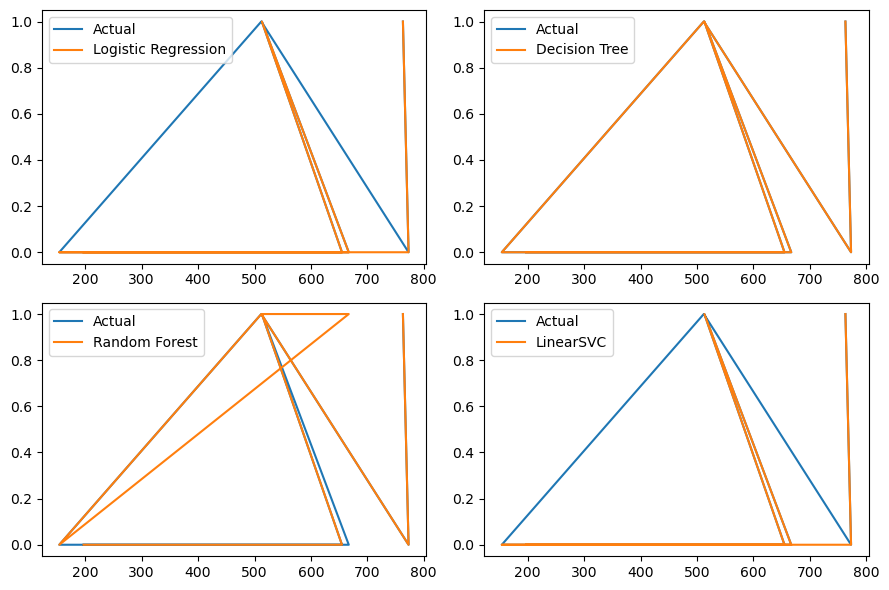

In [54]:
plt.figure(figsize=(9,6))
plt.subplot(221)      # 221 - 2 rows and 2 columns 1 subplot
plt.plot(df1['Actual'].iloc[0:8],label='Actual')
plt.plot(df1['Logistic Regression'].iloc[0:8],label='Logistic Regression')
plt.legend()


# here in the graph actual values are blue color
# and predicted ones are orange color
#since it is difficut to visualize we are using iloc 0:11 
#that means first 8 values for proper visualization

plt.subplot(222)# the 222 represents 2rows 2columns and 2nd subplot
plt.plot(df1['Actual'].iloc[0:8],label='Actual')
plt.plot(df1['Decision Tree'].iloc[0:8],label='Decision Tree')
plt.legend()

plt.subplot(223)# the 223 represents 2rows 2columns and 3rd subplot
plt.plot(df1['Actual'].iloc[0:8],label='Actual')
plt.plot(df1['Random Forest'].iloc[0:8],label='Random Forest')
plt.legend()

plt.subplot(224)# the 224 represents 2rows 2columns and 4th subplot
plt.plot(df1['Actual'].iloc[0:8],label='Actual')
plt.plot(df1['LinearSVC'].iloc[0:8],label='LinearSVC')
plt.legend()

plt.tight_layout()

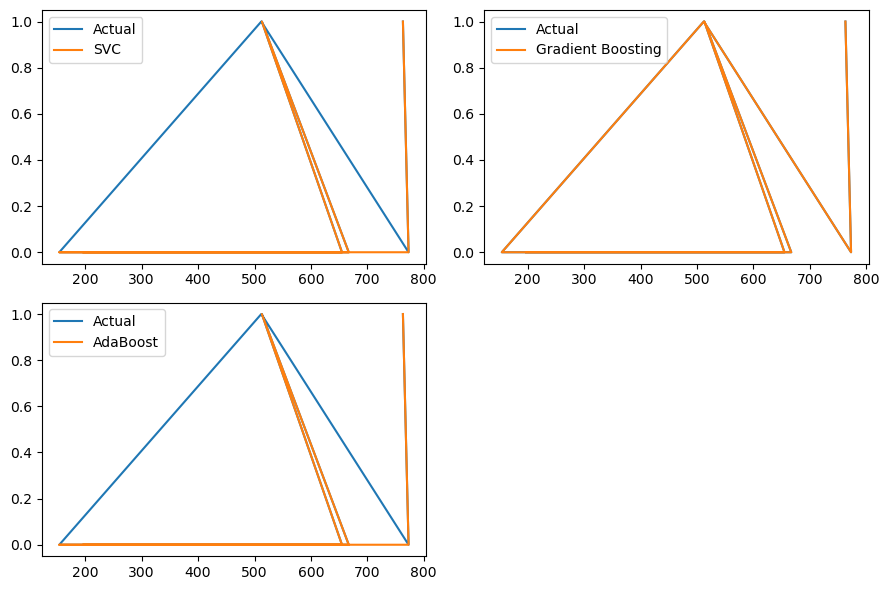

In [55]:
plt.figure(figsize=(9,6))
plt.subplot(221)      
plt.plot(df1['Actual'].iloc[0:8],label='Actual')
plt.plot(df1['SVC'].iloc[0:8],label='SVC')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:8],label='Actual')
plt.plot(df1['Gradient Boosting'].iloc[0:8],label='Gradient Boosting')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:8],label='Actual')
plt.plot(df1['AdaBoost'].iloc[0:8],label='AdaBoost')
plt.legend()

plt.tight_layout()

# From all the algorithm applied above, Gradient Boosting algorithm predicts good values compare to the Original values.

# Evaluating the Algorithms

In [56]:
#here to have best model out of 7 we are evaluating the algorithms

score1 = accuracy_score(ytest,ypred1)
score2 = accuracy_score(ytest,ypred2)
score3 = accuracy_score(ytest,ypred3)
score4 = accuracy_score(ytest,ypred4)
score5 = accuracy_score(ytest,ypred5)
score6 = accuracy_score(ytest,ypred6)
score7 = accuracy_score(ytest,ypred7)

In [57]:
print(score1,score2,score3,score4,score5,score6,score7)

0.7357723577235772 0.7764227642276422 0.7642276422764228 0.7398373983739838 0.7682926829268293 0.8008130081300813 0.7479674796747967


# from above accuracy_score = the highest accuracy given by 2nd lasi algo i.e Gradient Boosting classifier

In [58]:
# lets check Precision Score   - this shows which model have predicted high true positive values

p1 = precision_score(ytest,ypred1)
p2 = precision_score(ytest,ypred2)
p3 = precision_score(ytest,ypred3)
p4 = precision_score(ytest,ypred4)
p5 = precision_score(ytest,ypred5)
p6 = precision_score(ytest,ypred6)
p7 = precision_score(ytest,ypred7)

In [59]:
print (p1,p2,p3,p4,p5,p6,p7)

0.6631578947368421 0.7469879518072289 0.7111111111111111 0.6739130434782609 0.7142857142857143 0.7582417582417582 0.67


In [60]:
# lets check Recall Score - this indicates how many of the actual positives were correctly predicted 

r1 = recall_score(ytest,ypred1)
r2 = recall_score(ytest,ypred2)
r3 = recall_score(ytest,ypred3)
r4 = recall_score(ytest,ypred4)
r5 = recall_score(ytest,ypred5)
r6 = recall_score(ytest,ypred6)
r7= recall_score(ytest,ypred7)

In [61]:
print(r1,r2,r3,r4,r5,r6,r7)

0.65625 0.6458333333333334 0.6666666666666666 0.6458333333333334 0.6770833333333334 0.71875 0.6979166666666666


Gradient Boosting model predicts more True positive correctly. 

From all the above Evaluation of the models we can conclude that model 6 i.e Gradient Boosting is best for this dataset

# OverAll Model Accuracy = 80 % using GradientBoostingClassifier Algorithm

# Conclusion :-

    - From the above Dataset we found there are few factors which are highly important towawrd Survived or Not Survived.
    - Sex Play important role where Femals and Children Survived more then Male Passengers.
    - Pclass factor plays Vital role, Pclass 1 Passenger survived more then other classes.
    - Age factor also helps to survived child first 
    - Other factors like Ticket,Name,PassengerId doest not have much impact on Survial rate.